In [78]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

In [13]:
data = pd.read_csv('data/autos.csv', encoding='cp1252')

In [14]:
train, test = train_test_split(data, test_size=0.7, random_state=666)

In [17]:
profile = ProfileReport(train, title="Pandas Profiling Report")

profile

# Preliminar columns selection

In [18]:
train = train.loc[:,[
    'price','abtest','vehicleType','yearOfRegistration','gearbox','powerPS','model','kilometer',
    'monthOfRegistration','fuelType','brand','notRepairedDamage','postalCode','dateCrawled'
]]

Notes:
* price has zero values and very large values.
* vehicleType has 10% NA.
* yearOfRegistration has zero values.
* gearbox has 5.4% NA.
* powerPS has zero values.
* model has 5.6% NA.
* monthOfRegistration has 10% zero values.
* fuelType has 8.9% NA.
* notRepairedDamage has 19.3% NA.
* dateCrawled has high uniformity.

# Data exploration

In [29]:
train.dtypes

price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
postalCode              int64
dtype: object

## Price

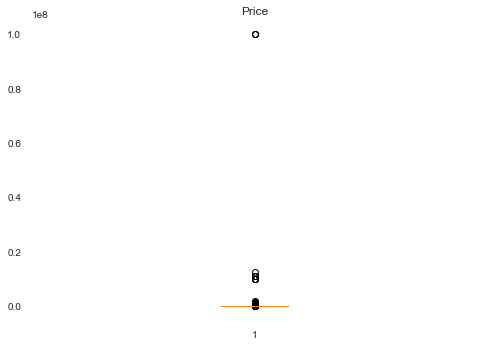

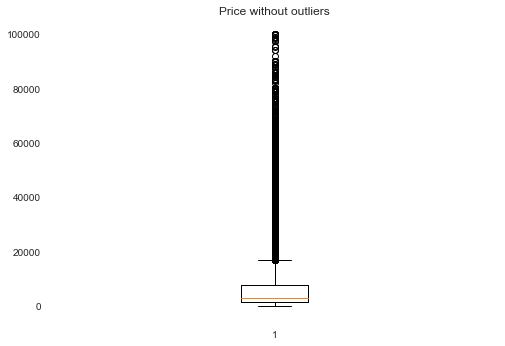

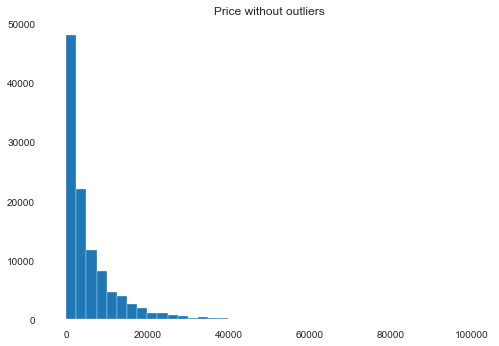

In [43]:
plt.boxplot(train.price)
plt.title('Price')
plt.show()

price = train.price.copy()
price = price[(price > 0) & (price < 100000)]
plt.boxplot(price)
plt.title('Price without outliers')
plt.show()

plt.hist(price, bins=40)
plt.title('Price without outliers')
plt.show()

### REMOVE outlier price

In [81]:
train = train.loc[train.price < 80000000,]

### Price variable discretization

In [104]:
price = train.price.copy().values
price = np.expand_dims(price, axis=1)

price_discretizer = KBinsDiscretizer(n_bins=12, encode='ordinal', strategy='quantile')
price_discretizer.fit(price)

price = price_discretizer.transform(price)

## Abtest

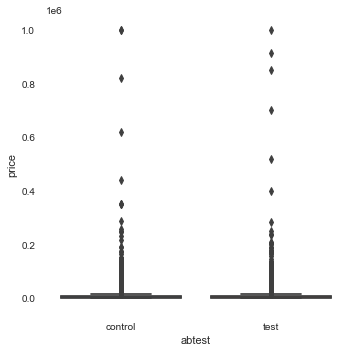

In [94]:
aux = train.copy().loc[train.price < 1000000]
sns.catplot(x="abtest", y="price", kind="box", data=aux)
plt.show()

There is no difference in price.

## vehicleType

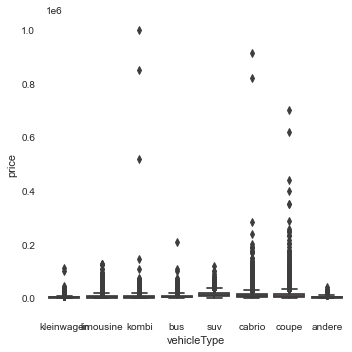

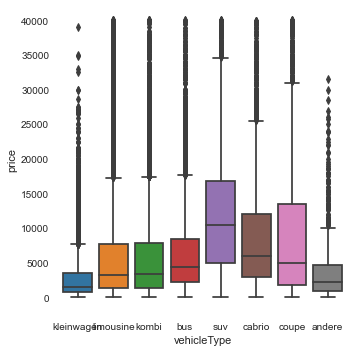

In [103]:
aux = train.copy().loc[train.price < 1000000]
sns.catplot(x="vehicleType", y="price", kind="box", data=aux)
plt.show()
aux = train.copy().loc[train.price < 40000]
sns.catplot(x="vehicleType", y="price", kind="box", data=aux)
plt.show()